## Definição do problema

Neste trabalho vamos experimentar o treinamento de um agente inteligente para o controle de um robo explorador. O ambiente aonde o robo será treinado e testado é um grid 4x4 com dois tipos de obstáculos: lama e material radioativo. Além do ponto de partida e do ponto de chegada. A figura a seguir ilustra o ambiente onde o automato deverá aprender e nevegar com segurança:

## Modelagem computacional 

A abordagem de treinamento escolhida para o controlador é metodo Q-learning, que tem como princípio fazer um mapeamento de *scores* de sucesso para cada tomada de decisão em cada estádo possível do problema. Neste problema a matriz Q, de onde o algorítmo deriva seu nome, representará 16 estados 1 para cada elementos da matriz quadrada de 4 elementos. E para cada estado, 4 ações podem ser tomada adicionado mais 4 elementos por cada estado, portanto a matrix Q tem tamanho 16x4.

Em uma abordagem parecida também modelamos uma matriz que representa o mapa e suas recompensas, que são fixas. A os valores de cada recompensa possível estão listados na tabela a seguir: 

| Tipo       | Recompensa | 
| ---        | ---        |
| Objetivo   | 20         | 
| Vazio      | -1         | 
| Lama       | -5         |
| Radioativo | -20        | 




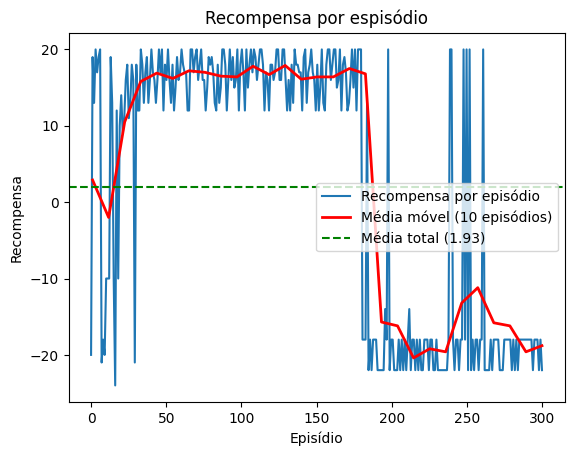

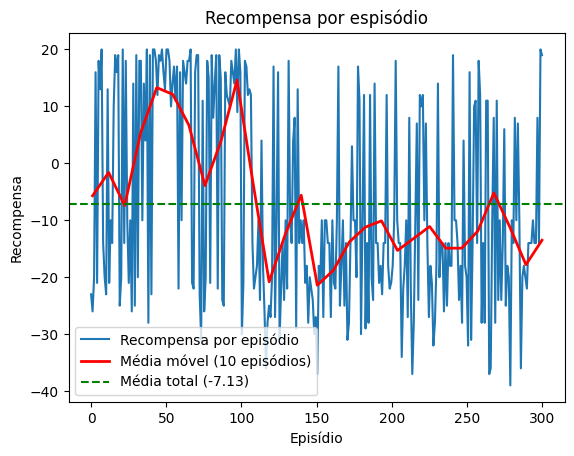

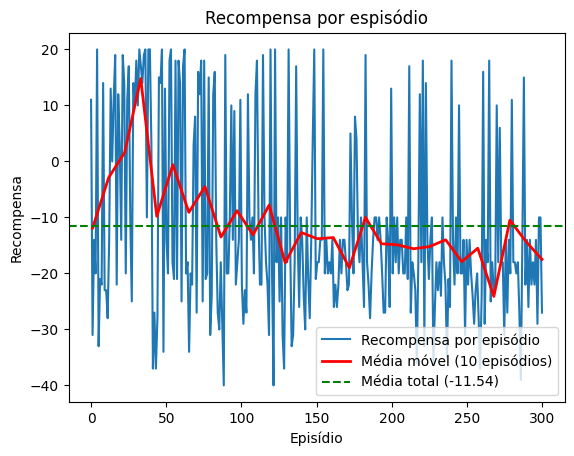

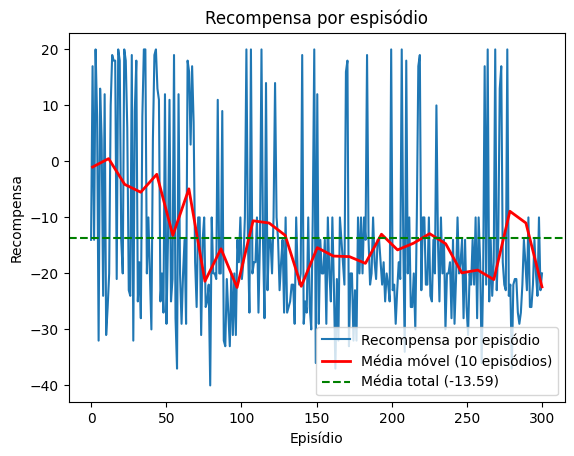

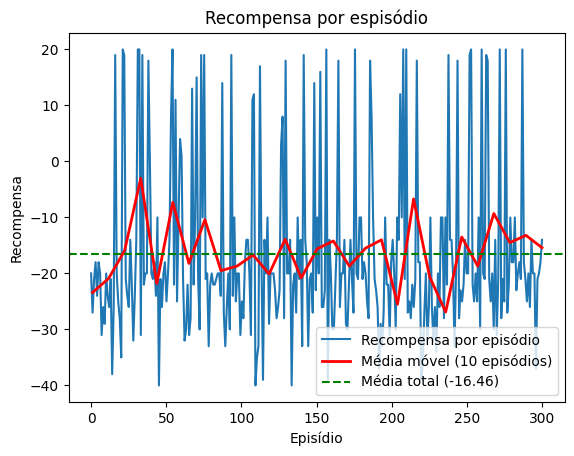

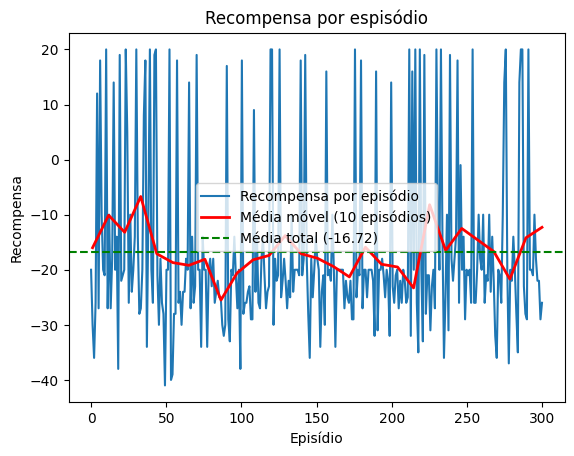

In [8]:
import sys  
import os
#sys.path.insert(1, '/Users/josoesantos/Projects/q_learning/src/classes')

import numpy as np
import matplotlib.pyplot as plt
import math

# Get the current working directory instead of using __file__
current_dir = os.getcwd()
path_to_classes = os.path.join(current_dir, 'src', 'classes')
sys.path.insert(1, path_to_classes)

from main import qlearning

def experiment(epsilon=0.1):    
    table, history = qlearning(total_episodes=300, epsilon=epsilon)

    x = np.linspace(0, len(history), len(history))
    plt.plot(x, history)

    avgs = []
    for i in range(10, len(history), 10):
        avg = np.mean(history[i-10:i])
        avgs.append(avg)
    plt.plot(np.linspace(1, len(history), math.floor(len(history) / 10) - 1), avgs, color='red', linewidth=2)


    plt.legend(["Recompensa por episódio", "Média móvel (10 episódios)"])

    total_avg = np.mean(history)
    plt.axhline(y=total_avg, color='green', linestyle='--', label='Média total')
   
    plt.legend(["Recompensa por episódio", "Média móvel (10 episódios)", f"Média total ({total_avg:.2f})"])

    plt.title("Recompensa por espisódio")
    plt.xlabel("Episídio")
    plt.ylabel("Recompensa")
    plt.show()

experiment(epsilon=0.01)
experiment(epsilon=0.3)
experiment(epsilon=0.5)
experiment(epsilon=0.7)
experiment(epsilon=0.9)
experiment(epsilon=1)

